# k Nearest Neighbors (KNN)

### Introduction
This code demonstrates the performance of a K-Nearest Neighbors (KNN) classifier on the MNIST dataset, which consists of handwritten digit images. The goal is to evaluate the accuracy of the KNN model for different values of K (the number of neighbors) and plot the accuracy versus K.

### Data Preparation
The MNIST dataset was loaded and preprocessed using the `torchvision` library. The images were normalized and converted to tensors. The dataset was then split into training and testing sets, and DataLoader objects were created to facilitate batch processing. \
\
**Note: Datasets were saved in "MNIST" folder**

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

train_set = datasets.MNIST('./MNIST/', train=True, transform=transform, download=True)
test_set = datasets.MNIST('./MNIST/', train=False, transform=transform, download=True)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

### Data Extraction
The images and labels were extracted from the DataLoader objects and converted to numpy arrays for compatibility with the scikit-learn library.\
\
**Note: Test cases added to make sure dataset lengths are correct**

In [3]:
import numpy as np

# Train set, extract data and labels from the DataLoader
X_train = []
Y_train = []

for images, labels in train_loader:
    X_train.append(images.view(images.shape[0], -1).numpy())
    Y_train.append(labels.numpy())

X_train = np.concatenate(X_train)
Y_train = np.concatenate(Y_train)

# Test set, extract data and labels from the DataLoader
X_test = []
Y_test = []

for images, labels in test_loader:
    X_test.append(images.view(images.shape[0], -1).numpy())
    Y_test.append(labels.numpy())

X_test = np.concatenate(X_test)
Y_test = np.concatenate(Y_test)

In [4]:
# Check data length, make sure test and train data are correct
assert len(X_train)==60000
assert len(Y_train)==60000

assert len(X_test)==10000
assert len(Y_test)==10000

print(len(X_train),len(Y_train),len(X_test),len(Y_test))

60000 60000 10000 10000


### Model Training and Evaluation
A KNN classifier was trained and evaluated for different values of K (from 1 to 10). The Manhattan distance metric was used to calculate the distance between points. The accuracy of the model was recorded for each value of K.\
\
Note:
- Use data for sklearn KNN training (k from 1 to 10) & testing (accuracy)
- Use 'manhattan' to ensure sum of absolute difference (SAD) is used as difference metric

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    val_accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(val_accuracy)
    print(f'Validation Accuracy for k={k}: {val_accuracy}')

Validation Accuracy for k=1: 0.9631
Validation Accuracy for k=2: 0.954
Validation Accuracy for k=3: 0.9633
Validation Accuracy for k=4: 0.9607
Validation Accuracy for k=5: 0.9618
Validation Accuracy for k=6: 0.961
Validation Accuracy for k=7: 0.9615
Validation Accuracy for k=8: 0.9595
Validation Accuracy for k=9: 0.9597
Validation Accuracy for k=10: 0.9588


### Results
The accuracy scores for different values of ( K ) were plotted to visualize the performance of the KNN model.

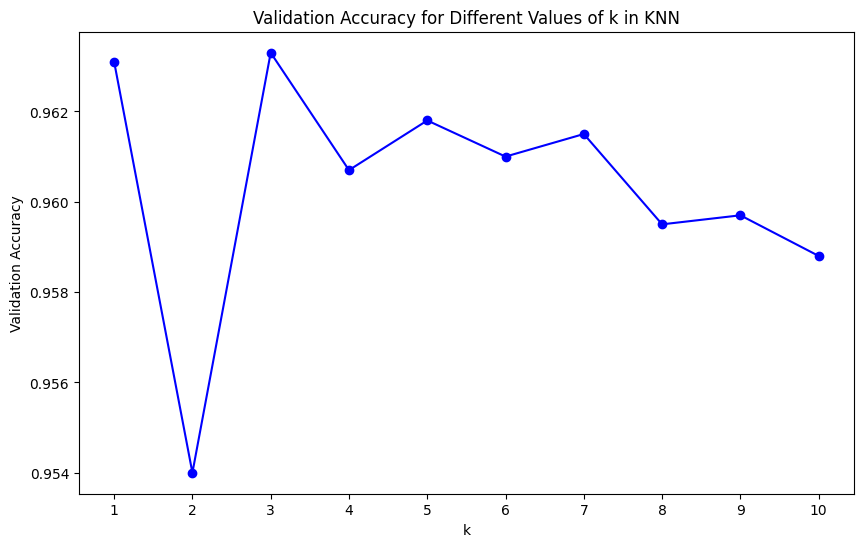

In [6]:
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy for Different Values of k in KNN')
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 11))
plt.show()

### Question & Answer
**Question 1**\
What will be the accuracy if we find the nearest neighbor?

$\color{blue}{\textit Answer:}$\
When k=1, the KNN algorithm assigns the label of the nearest neighbor, the accuracy is 96.31%.

\
**Question 2**\
What will be the accuracy if we find K neighbors?

$\color{blue}{\textit Answer:}$\
When k>1, the KNN algorithm assigns the label based on the majority vote among the K nearest neighbor, it can provide a more robust classification. The accuracy improves with increasing from k=2 to k=3 (k=3 accuracy is 96.33%), after it start to decrease as it become generalized.

### Conclusion
The plot of validation accuracy versus K shows how the performance of the KNN model changes with different values of K. Generally, the accuracy improves with increasing K up to a certain point, after which it may stabilize or decrease slightly due to over-generalization.\
\
This analysis helps in selecting an optimal value of K for the KNN model to achieve the best performance on the MNIST dataset.

### Future Work
1. **Hyperparameter Tuning**
- Explore different distance metrics (e.g., Euclidean, Chebyshev) to see if they yield better accuracy.
- Experiment with different values of ( K ) beyond the range of 1 to 10 to identify the optimal ( K ).
2. **Cross Validation**
- Implement k-fold cross-validation to ensure the robustness of the model and to better estimate its performance on unseen data.
3. **Comparison with Other Models**
- Compare the performance of the KNN model with other machine learning models such as Support Vector Machines (SVM), Random Forests, or Convolutional Neural Networks (CNNs) to identify the best-performing model for the MNIST dataset.